WARNING - the 'fullGenLapack' eigen solver is VERY SLOW. Consider using the default eigen solver.Using DomainModalProperties - Developed by: Massimo Petracca, Guido Camata, ASDEA Software Technology


Análisis de gravedad completado
step: 1 / 150

step: 2 / 150

step: 3 / 150

step: 4 / 150

step: 5 / 150

step: 6 / 150

step: 7 / 150

step: 8 / 150

step: 9 / 150

step: 10 / 150

step: 11 / 150

step: 12 / 150

step: 13 / 150

step: 14 / 150

step: 15 / 150

step: 16 / 150

step: 17 / 150

step: 18 / 150

step: 19 / 150

step: 20 / 150

step: 21 / 150

step: 22 / 150

step: 23 / 150

step: 24 / 150

step: 25 / 150

step: 26 / 150

step: 27 / 150

step: 28 / 150

step: 29 / 150

step: 30 / 150

step: 31 / 150

step: 32 / 150

step: 33 / 150

step: 34 / 150

step: 35 / 150

step: 36 / 150

step: 37 / 150

step: 38 / 150

step: 39 / 150

step: 40 / 150

step: 41 / 150

step: 42 / 150

step: 43 / 150

step: 44 / 150

step: 45 / 150

step: 46 / 150

step: 47 / 150

step: 48 / 150

step: 49 / 150

step: 50 / 150

step: 51 / 150

step: 52 / 150

step: 53 / 150

step: 54 / 150

step: 55 / 150

step: 56 / 150

step: 57 / 150

step: 58 / 150

step: 59 / 150

step: 60 / 150

step: 61 / 150

s

after: 10 iterations  current Norm: 3.10155 (max: 0.01, Norm deltaX: 1.55132e-05)
NewtonRaphson::solveCurrentStep() -the ConvergenceTest object failed in test()
StaticAnalysis::analyze() - the Algorithm failed at step: 0 with domain at load factor 5302.27
OpenSees > analyze failed, returned: -3 error flag
after: 10 iterations  current Norm: 25.6859 (max: 0.01, Norm deltaX: 0.000105896)
NewtonRaphson::solveCurrentStep() -the ConvergenceTest object failed in test()
StaticAnalysis::analyze() - the Algorithm failed at step: 0 with domain at load factor 5282.12
OpenSees > analyze failed, returned: -3 error flag
after: 10 iterations  current Norm: 22.6053 (max: 0.01, Norm deltaX: 0.000269854)
NewtonRaphson::solveCurrentStep() -the ConvergenceTest object failed in test()
StaticAnalysis::analyze() - the Algorithm failed at step: 0 with domain at load factor 4879.72
OpenSees > analyze failed, returned: -3 error flag


step: 89 / 150

step: 90 / 150

step: 91 / 150

step: 92 / 150

step: 93 / 150

step: 94 / 150

step: 95 / 150

step: 96 / 150

configuración por defecto no converge en desplazamiento:  0.2401703197523189
step: 97 / 150

step: 98 / 150

step: 99 / 150

step: 100 / 150

step: 101 / 150

step: 102 / 150

step: 103 / 150

step: 104 / 150

step: 105 / 150

step: 106 / 150

step: 107 / 150

step: 108 / 150

step: 109 / 150

step: 110 / 150

step: 111 / 150

step: 112 / 150

step: 113 / 150

step: 114 / 150

step: 115 / 150

step: 116 / 150

step: 117 / 150

step: 118 / 150

step: 119 / 150

step: 120 / 150

step: 121 / 150

step: 122 / 150

step: 123 / 150

step: 124 / 150

step: 125 / 150

step: 126 / 150

step: 127 / 150

step: 128 / 150

step: 129 / 150

step: 130 / 150

step: 131 / 150

step: 132 / 150

step: 133 / 150

step: 134 / 150

step: 135 / 150

step: 136 / 150

step: 137 / 150

step: 138 / 150

step: 139 / 150

step: 140 / 150

step: 141 / 150

step: 142 / 150

step: 143 / 150


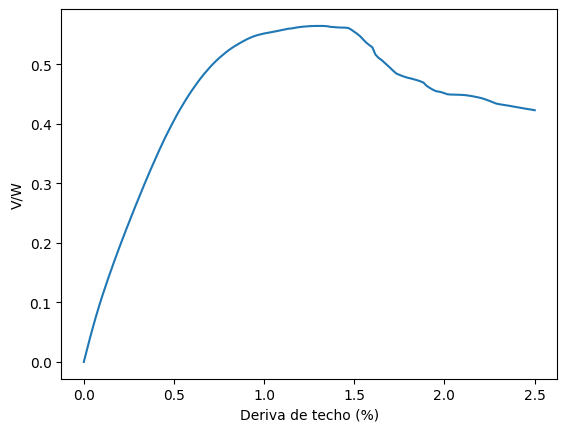

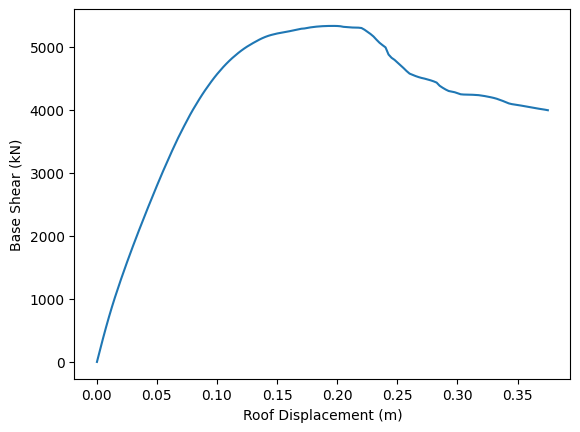

In [1]:
# -*- coding: utf-8 -*-
"""
Created on Fri Sep  6 14:49:27 2024

@author: HOME
"""
#%% Cargado librerías

from openseespy.opensees import *
import matplotlib.pyplot as plt
#import opsvis as opsv
import opseestools.analisis3D as an
import opseestools.utilidades as ut
#import vfo.vfo as vfo
import numpy as np
import pandas as pd
import time
#%% Creación del modelo

wipe()
model('basic','-ndm',3,'-ndf',6)


#%% Node definition
coordx = [0, 8.6, 12.6]
coordy = [0, 7.3, 14.6, 21.9]
coordz = [0, 3, 6, 9, 12, 15]

masas = [210,210,210,210,210]

coords = ut.creategrid3D(coordx,coordy,coordz,1,masas)
fixZ(0.0,1,1,1,1,1,1)

#%% Material definition
level = 'DES' # DMO or PreCode
fc = 28
fy = 420
noconf, conf, acero = ut.col_materials(fc,fy,detailing = level,nps=3,tension='yes')

#%% Element definition

Bcol = 0.60 # column base
Hcol = 0.80 # column height
Bcol1 = 0.60 # column base
Hcol1 = 0.70 # column height
Bcol2 = 0.60 # column base
Hcol2 = 0.60 # column height
Bvig = 0.40 # beam base
Hvig = 0.60 # beam height
Bvig2 = 0.30 # beam base
Hvig2 = 0.50 # beam height
c = 0.05  # recubrimiento de las secciones

As4 = 0.000127 # area barra #4
As5 = 0.0002 # area barra #5
As6 = 0.000286
As7 = 0.000387 # area barra #7
As8 = 0.000508 # area barra #8

col80x60 = 101 # column tag
col70x60 = 102 # column tag
col60x60 = 103 # column tag
vig60x40 = 201 # beam tag
vig50x30 = 202 # second beam tag
ut.create_rect_RC_section(col80x60, Hcol, Bcol, c, conf, noconf, acero, 8, As6, 8, As6, 8, As6)
ut.create_rect_RC_section(col70x60, Hcol1, Bcol1, c, conf, noconf, acero, 7, As6, 7, As6, 8, As6)
ut.create_rect_RC_section(col60x60, Hcol2, Bcol2, c, conf, noconf, acero, 7, As6, 7, As6, 6, As6)
ut.create_rect_RC_section(vig60x40, Hvig, Bvig, c, conf, noconf, acero, 6, As6, 5, As6)
ut.create_rect_RC_section(vig50x30, Hvig2, Bvig2, c, conf, noconf, acero, 5, As6, 5, As6)

#%% Creando los elementos
eje_y = [col80x60]*4 # four axes of columns in the Y direction because there are four values in coordy
eje_y2 = [col70x60]*4 # four axes of columns in the Y direction because there are four values in coordy
eje_y3 = [col60x60]*4 # four axes of columns
p1 = [eje_y, eje_y2, eje_y3] # three axes in the X direction because there are three values in coordx
coltags = [p1]*5 # five floors in this example because there are six values in coordz
vigax1 = [vig60x40]*4 # four beams in the X direction because there are four values in coordy
vigap1 = [vigax1]*2 # two axes of beams in the X direction because there are three values in coordx
vigased = [vigap1]*5 # five floors in this example

vigay1 = [vig50x30]*3 # three values because there are four values in coordy
vigap1y = [vigay1]*3 # three axes in the X direction because there are three values in coordx
vigasedY = [vigap1y]*5 # five floors in this example

cols, vigx, vigy, sectag_col, sectag_vigx, sectag_vigy = ut.create_elements3D2(coordx, coordy, coordz, coltags, vigased, vigasedY)
#opsv.plot_model(node_labels=1,gauss_points=False)
#plt.show()


#%% Beam loading
floorx = 30
floory = 30
roofx = 20
roofy = 20
ut.load_beams3D(-floorx, -floory, -roofx, -roofy, vigx, vigy, coordx, coordy)

#%% Model calculation

eig = eigen('-fullGenLapack',(len(coordz)-1)*2)
modalProperties('-print', '-unorm')

# vfo.plot_modeshape(scale=15, contour='X', modenumber=1)

#%% Model analysis

an.gravedad()
plt.show()
loadConst('-time',0.0)

#%% Pushover direction X
dir = 'x' # 1 for X, 2 for Y
perc = 0.025
pushlimit = perc*coordz[-1] # percent of building height
dincr = 0.0025
ut.pushover_loads3D(coordz,pushdir=dir)
model_nodes = getNodeTags()
control_nodes = model_nodes[:len(coordz)-1]
control_nodes.insert(0,model_nodes[len(coordz)-1])
model_elements = getEleTags()
first_story_columns = [elem for elem in model_elements if 10000 <= elem < 20000] # Filter elements with tags between 10000 (inclusive) and 20000 (exclusive)
stime = time.time()
dtecho,Vbasal,drift,rotaciones = an.pushover2DRot(pushlimit, dincr, len(coordz)-1, 1, control_nodes, first_story_columns ,norm=[coordz[-1],np.sum(masas)*9,81],Tol=1e-2)
etime = time.time()
ttotal = etime - stime
print('tiempo de ejecucion: ',ttotal,'segundos')
plt.show()

plt.plot(dtecho,Vbasal)
plt.xlabel('Roof Displacement (m)')
plt.ylabel('Base Shear (kN)')
plt.show()
